In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [95]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)

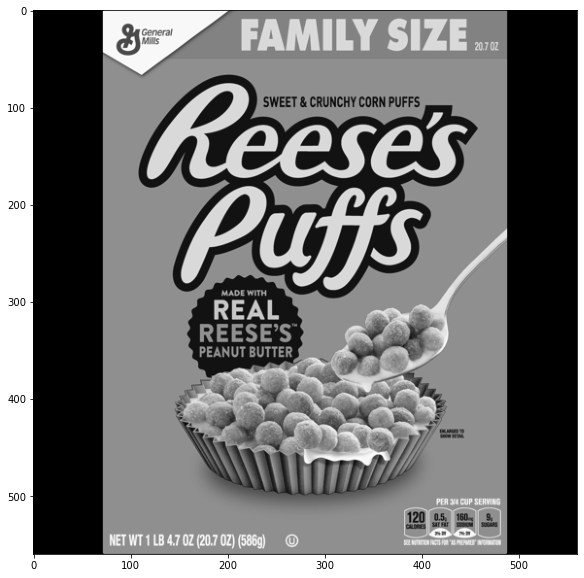

In [96]:
display(reeses)

In [97]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)

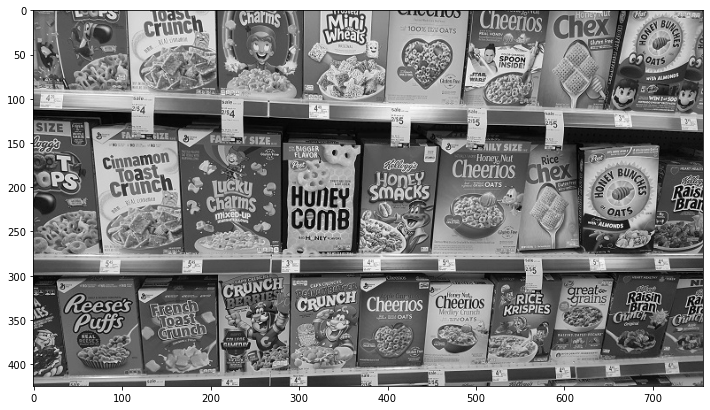

In [98]:
display(cereals)

In [99]:
orb = cv2.ORB_create()

In [100]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [101]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [102]:
matches = bf.match(des1,des2)

In [103]:
single_match = matches[0]

In [104]:
single_match.distance

56.0

In [105]:
len(matches)

139

In [106]:
matches = sorted(matches, key=lambda x:x.distance)

In [107]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals,kp2, matches[:25],None,flags=2)

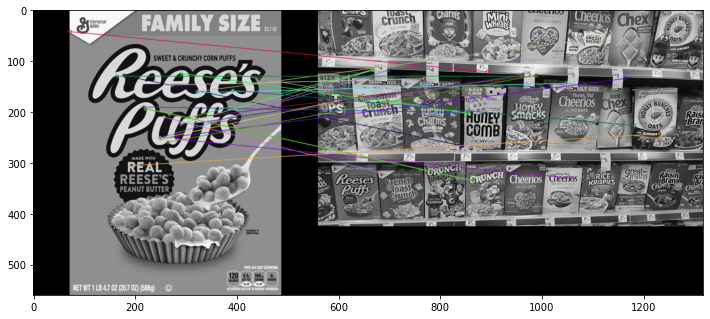

In [108]:
display(reeses_matches)

In [109]:
sift = cv2.xfeatures2d.SIFT_create()

In [110]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [111]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [112]:
bf = cv2.BFMatcher()

In [113]:
matches = bf.knnMatch(des1, des2, k=2)

In [114]:
good = []
#less distance  == better match
#ratio match1 > 75% match2
for match1, match2 in matches:
    #if match 1 distance is less than 75% of match 2 distance
    #then descriptor was a good match. lets keep it!
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        

In [115]:
len(good)

79

In [116]:
len(matches)

1501

In [117]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals,kp2, good,None, flags=2)

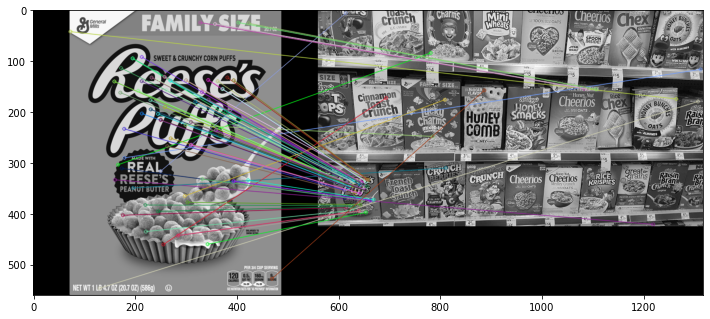

In [118]:
display(sift_matches)

In [119]:
sift = cv2.xfeatures2d.SIFT_create()

In [120]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [121]:
#flann -->fast library for aproximate nearest neigbours  (faster than the brodforse methid)
FLANN_INDEX_KDTREE =0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees =5)
search_params = dict(checks=50)


In [122]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [123]:
matches = flann.knnMatch(des1, des2, k=2)

In [124]:
matchesMask = [[0,0] for i in range(len(matches))]

In [125]:
# matchesMask

In [126]:
for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
    

In [135]:
draw_params = dict(matchColor = (0,255,0),singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0 )

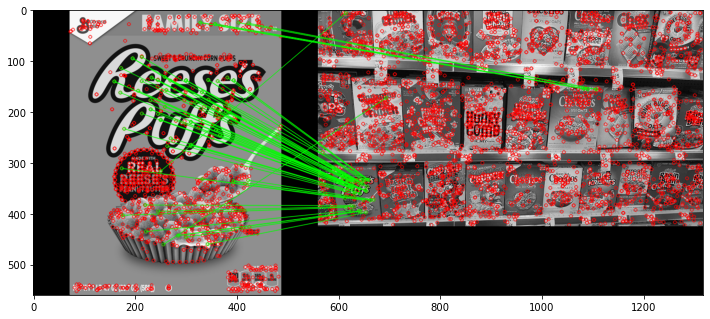

In [136]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)